In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import nfl_data_py as nfl

In [2]:
# Read in the data
df = pd.read_csv("data/tracking_week_1.csv")

In [8]:
# Filter for example.play equivalent
example_play = df[(df['gameId'] == 2022090800) & (df['playId'] == 80)]

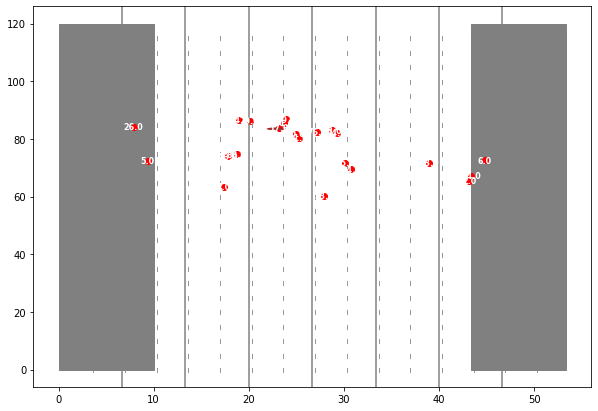

In [12]:
from matplotlib.patches import Rectangle, Ellipse
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np

# Assuming `example_play` DataFrame is already defined

def animate_play_with_field(example_play):
    fig, ax = plt.subplots(figsize=(10, 7))

    # General field boundaries
    xmax = 160 / 3
    ymax = 120
    
    ax.set_xlim(0, xmax)
    ax.set_ylim(0, ymax)
    
    def draw_field(ax):
        # End zones
        ax.add_patch(Rectangle((0, 0), 10, ymax, color='grey', label='End Zone'))
        ax.add_patch(Rectangle((xmax - 10, 0), 10, ymax, color='grey', label='End Zone'))
        
        # Yard lines
        for x in range(20, 160, 20):
            ax.axvline(x / 3, color='grey')
        
        # Hash marks
        for x in range(10, 160, 10):
            for y in range(0, ymax, 5):
                ax.annotate("_", (x / 3, y), ha='center', va='center', rotation=90, color='grey')
                
    def update(frame):
        ax.clear()
        draw_field(ax)
        
        frame_data = example_play[example_play['frameId'] == frame]
        
        for _, row in frame_data.iterrows():
            color = 'blue' if row['club'] == 'home' else 'red'
            if row['displayName'] == 'football':
                ax.add_patch(Ellipse((xmax - row['y'], row['x']), width=2, height=1, fc='brown'))
            else:
                ax.scatter(xmax - row['y'], row['x'], c=color)
                ax.text(xmax - row['y'], row['x'], str(row['jerseyNumber']), ha='center', va='center', color='white', fontsize=8, weight='bold')

    anim = FuncAnimation(fig, update, frames=np.sort(example_play['frameId'].unique()), blit=False)
    
    return HTML(anim.to_jshtml(fps=10))

# Assuming you've already filtered it for `example_play`
HTML_display = animate_play_with_field(example_play)
HTML_display

In [6]:
example_play

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2022090800,56,NaN,football,18,2022-09-08 20:24:06.900000,NaN,football,left,78.160004,36.650002,0.07,0.27,0.01,NaN,NaN,tackle
502,2022090800,56,NaN,football,19,2022-09-08 20:24:07.000000,NaN,football,left,78.230003,36.389999,0.05,0.18,0.27,NaN,NaN,NaN
503,2022090800,56,NaN,football,20,2022-09-08 20:24:07.099999,NaN,football,left,78.230003,36.389999,0.04,0.13,0.00,NaN,NaN,NaN
504,2022090800,56,NaN,football,21,2022-09-08 20:24:07.200000,NaN,football,left,78.220001,36.389999,0.02,0.09,0.00,NaN,NaN,NaN
